In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mutations = ['F389L', 'S193A', 'S193V', 'S193L', 'V91F', 'W100L', 'C118M', 'W386F']
ligands = ['Spiperone', 'Mespiperone', 'Benperidol', 'Pimozide']
colors = ['c', 'm', 'orange', 'r']

affinities = [[0.044, 0.701, 0.047, 0.034, 0.065, 0.213, 0.385, 0.324, 4.045],
              [0.078, 2.328, 0.066, 0.049, 0.077, 0.324, 0.734, 0.71, 8.925],
              [0.135, 1.151, 0.158, 0.092, 0.111, 0.298, 1.987, 2.039, 13.898],
              [0.201, 0.555, 0.122, 0.417, 0.459, 0.448, 2.965, 1.33, 11.021]]
sems = [[0.004, 0.114, 0.004, 0.008, 0.018, 0.06, 0.086, 0.018, 0.185],
        [0.015, 0.341, 0.012, 0.006, 0.006, 0.051, 0.033, 0.091, 1.931],
        [0.021, 0.084, 0.021, 0.014, 0.007, 0.044, 0.223, 0.267, 4.195],
        [0.046, 0.178, 0.032, 0.112, 0.085, 0.105, 0.368, 0.281, 0.886]]

low, mean, high, error = [], [], [], []

for affinity, sem in zip(affinities, sems):
    low += [[]]
    mean += [[]]
    high += [[]]
    error += [[]]
    for a, e in zip(affinity[1:], sem[1:]):
        l = a - e
        h = a + e

        l_wt = affinity[0] - sem[0]
        h_wt = affinity[0] + sem[0]

        mean[-1] += [np.log(a) - np.log(affinity[0])]
        low[-1] += [mean[-1][-1] - (np.log(l) - np.log(h_wt))]
        high[-1] += [(np.log(h) - np.log(l_wt)) - mean[-1][-1]]

In [3]:
def get(ligand, mutation, metric):
    if metric == 'mean':
        data = mean
    elif metric == 'low':
        data = low
    elif metric == 'high':
        data = high
    else:
        assert False
    return data[ligands.index(ligand)][mutations.index(mutation)]

In [4]:
np.random.rand(4)

array([0.3335645 , 0.80664383, 0.23123006, 0.33519175])

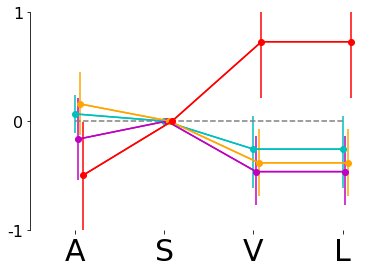

In [14]:
ax = plt.subplot(111)
for color, ligand in zip(colors, ligands):
    x = np.linspace(0, 3, 4) + ligands.index(ligand)*0.03
    y = [get(ligand, 'S193A', 'mean'), 0.0, get(ligand, 'S193V', 'mean'), get(ligand, 'S193V', 'mean')]
    err = [[get(ligand, 'S193A', 'low'), 0.0, get(ligand, 'S193V', 'low'), get(ligand, 'S193V', 'low')],
           [get(ligand, 'S193A', 'high'), 0.0, get(ligand, 'S193V', 'high'), get(ligand, 'S193V', 'high')]]
    plt.plot(x, y, c = color)
    ax.errorbar(x, y, yerr=err, fmt='-o', c = color)
    
ax.plot([0, 3], [0, 0], '--', c = 'grey', )
ax.set_xticks(range(4))
ax.set_xticklabels(['A', 'S', 'V', 'L'], fontsize = 30)
ax.set_ylim(-1, 1)
ax.set_xlim(-0.5, 3.25)
ax.set_yticks(range(-1, 2))
ax.set_yticklabels(range(-1, 2), fontsize = 16)

#ax.set_title('S193', fontsize=40)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.savefig('../pymol/figures/D2_panels/S193.pdf')
plt.show()

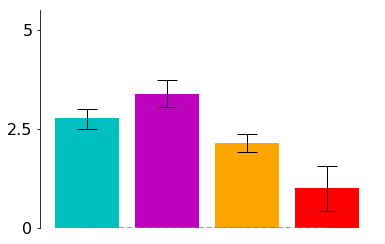

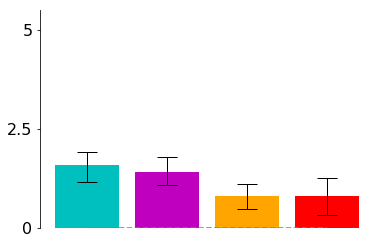

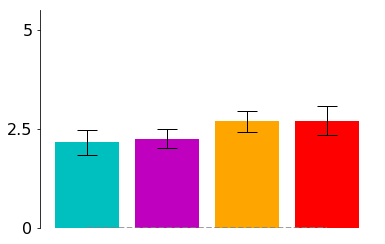

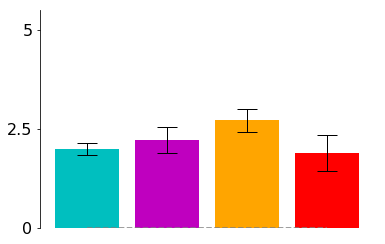

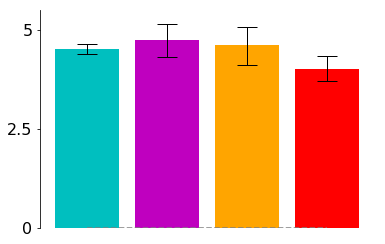

In [9]:
for mutation in mutations:
    if '193' in mutation: continue
    ax = plt.subplot(111)
    y = [get(ligand, mutation, 'mean') for ligand in ligands]
    yerr = [[get(ligand, mutation, 'low') for ligand in ligands],
            [get(ligand, mutation, 'high') for ligand in ligands]]
    ax.bar(range(len(ligands)), y, yerr = yerr, color = colors,
           error_kw={'elinewidth': 1, 'capsize': 10, 'capthick':1})
    ax.plot([0, 3], [0, 0], '--', c = 'grey', )
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    ax.set_ylim(0, 5.5)
    ax.set_yticks([0, 2.5, 5])
    ax.set_yticklabels([0, 2.5, 5], fontsize=16)
    #ax.set_title(mutation, fontsize=40)
    
    ax.set_xticks([])
    
    plt.savefig('../pymol/figures/D2_panels/{}.pdf'.format(mutation))
    plt.show()